<a href="https://colab.research.google.com/github/ydydydydydy/Colab/blob/main/ex101_%EB%84%A4%EC%9D%B4%EB%B2%84_%EC%98%81%ED%99%94_%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 깃허브에 있는 네이버 영화 리뷰 데이터 다운로드
!git clone https://github.com/e9t/nsmc.git

fatal: destination path 'nsmc' already exists and is not an empty directory.


In [ ]:
# 한글 형태소 분류
!pip install konlpy

In [ ]:
import pandas as pd

train_data = pd.read_table('/content/nsmc/ratings_train.txt')
text_data = pd.read_table('/content/nsmc/ratings_test.txt')

len(train_data), len(text_data)

(150000, 50000)

In [ ]:
# 0: 부정
# 1: 긍정
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [ ]:
text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [ ]:
# 결측치 제거
# 리뷰가 결측치이다 = 아무것도 없다
train_data.loc[train_data['document'].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [ ]:
# any : 열에서 하나라도 값이 비어있으면 해당 행을 삭제
train_data = train_data.dropna(how = 'any')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [ ]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
# 한글과 공백을 제외하고 다른 값들은 제거
# ^ : 제외하고
# ㄱ-ㅎ : ㄱ부터 ㅎ까지
# ㅏ-ㅣ : ㅏ부터 ㅣ까지
# 가-힣 : 가부터 힣까지
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

<ipython-input-48-caed49382963>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [ ]:
train_data.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [ ]:
# 전처리후 값이 비어있는 데이터
# 주로 영어, 숫자, 특수문자, 이모티콘 등으로 이루어진 리뷰
train_data.loc[train_data['document'] == ""]

,id,document,label
584,7117896,,0
593,6478189,,0
638,9364602,,0
668,1600635,,0
1058,5890638,,0
...,...,...,...
149358,6780491,,0
149364,8014701,,1
149718,7690797,,1
149862,7175749,,0


In [ ]:
# 공백이 아닌 데이터들만 다시 저장
train_data = train_data[train_data['document'] != ""]

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149186 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149186 non-null  int64 
 1   document  149186 non-null  object
 2   label     149186 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [ ]:
# 결측치 제거
# 없는 데이터 삭제
test_data =test_data.dropna(how = 'any')
# 한글이 아닌 데이터 없애기
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글이 아닌 데이터 없애면서 비어버린 데이터 삭
test_data = test_data[test_data['document'] != ""]
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149186 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149186 non-null  int64 
 1   document  149186 non-null  object
 2   label     149186 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


<ipython-input-53-e8ed0f32088b>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [ ]:
# 불용어 제거(의미없는 단어)
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 토큰화 : 문장을 형태소별로 나누는 작업
import konlpy # 형태소 분류기
from konlpy.tag import Okt # 그 중에 하나

X_train = []

okt = Okt()

for sentence in train_data['document']:
  temp_X = []  # 토큰화 결과를 저장할 임시 변수
  # 토큰화 morphs : 형태소별로 구분
  # stem : 일정 수준의 정규화(기본형태로 바꿈) 진행('먹다, 먹는다, 먹겠다, 먹었다' 모두-> 먹다로 바꾸어줌)
  temp_X = okt.morphs(sentence, stem = True)
  # 토큰화된 값 중에서 불용어가 있으면 불용어 빼고 저장 / 리스트 내포
  temp_X = [word for word in temp_X if not word in stopwords]
  X_train.append(temp_X)


In [ ]:
# temp_X = [word for word in temp_X if not word in stopwords]
temp = []
for word in temp_X:
  if not word in stopwords:  # 토큰화된 단어가 불용어가 아니면 저장
    temp.append(word)


In [ ]:
# 불용어 제거(의미없는 단어)
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 토큰화 : 문장을 형태소별로 나누는 작업
import konlpy # 형태소 분류기
from konlpy.tag import Okt # 그 중에 하나

X_test = []

okt = Okt()

for sentence in test_data['document']:
  temp_X = []  # 토큰화 결과를 저장할 임시 변수
  # 토큰화 morphs : 형태소별로 구분
  # stem : 일정 수준의 정규화(기본형태로 바꿈) 진행('먹다, 먹는다, 먹겠다, 먹었다' 모두-> 먹다로 바꾸어줌)
  temp_X = okt.morphs(sentence, stem = True)
  # 토큰화된 값 중에서 불용어가 있으면 불용어 빼고 저장 / 리스트 내포
  temp_X = [word for word in temp_X if not word in stopwords]
  X_test.append(temp_X)


In [ ]:
X_train[0]

['아', '더빙', '진짜', '짜증나다', '목소리']

In [ ]:
# 정수 인코딩
from tensorflow.keras.preprocessing.text import Tokenizer

max_feature = 35000

tokenizer = Tokenizer(num_words = max_feature) # 상위(빈도수) 35,000개의 단어만 사용
# 약 150만개 단어 중에서 몇 번 안 나온 단어들은 긍/부정을 판단하기가 애매 -> 사용 안 함
# 3.5만개 단어 거르기
tokenizer.fit_on_texts(X_train)

# 3.5만개 단어만 숫자로 변
X_train = tokenizer.texts_to_sequences(X_train)
X_text = tokenizer.texts_to_sequences(X_test)

리뷰의 최대 길이 : 69
리뷰의 평균 길이 : 10.704737709972786


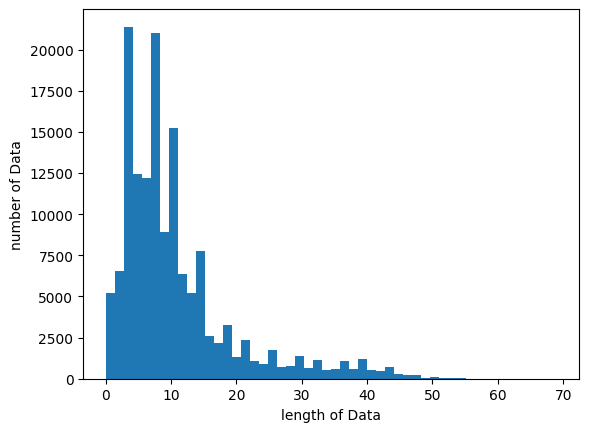

In [ ]:
import matplotlib.pyplot as plt

print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()
# 리뷰의 평균 길이는 약 11
# 대다수의 리뷰를 사용하기 위해서 단어의 수는 30개로 제한할 예정

In [ ]:
max_word = 30

# 리뷰의 길이를 30으로 통일
# 짧은건 앞에 공백 채우기
# 긴건 뒤에 단어 자르기
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen = max_word)
X_test = pad_sequences(X_test, maxlen = max_word)

ValueError: ignored

In [ ]:
y_train = train_data['label']
y_test = test_data['label']

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

In [ ]:
model = Sequential()

model.add(Embedding(max_feature, 100, input_length = max_word))
model.add(LSTM(128)) # RNN의 상위버전, 기억력이 좋음, RNN보다 일반적으로 성능이 좋음
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 10, batch_size = 60, validation_split = 0.2)

model.save('naver_review_analysis.h5')